# K-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Load data

In [2]:
df = pd.read_csv("../data/biomechanical_classification.csv")

### Define variables

In [3]:
k = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

### Train KNN model

In [4]:
# Iterate over k=<1,25) hyperparameter values
for v in k:
    classifier = KNeighborsClassifier(n_neighbors=v)

    # Split to dependend and independent variables
    X = df.loc[:, df.columns != "class"]
    y = df["class"]
    
    # Create train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)

    train_accuracy.append(classifier.score(X_train, y_train))
    test_accuracy.append(classifier.score(X_test, y_test))

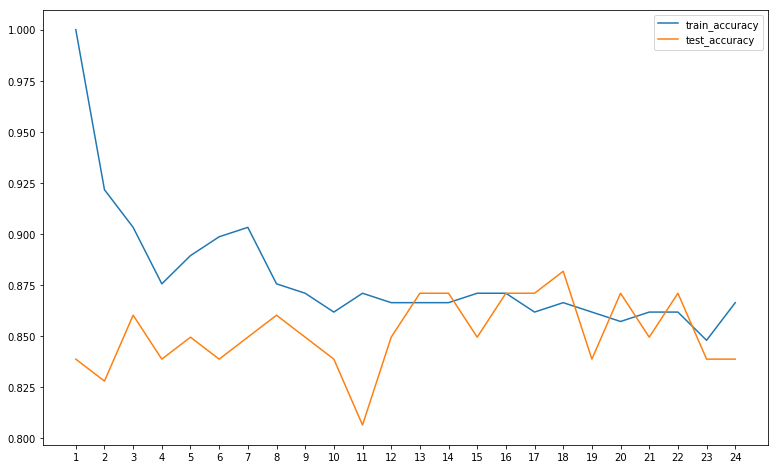

In [5]:
# Plot test and train accuracy
plt.figure(figsize=[13, 8])
plt.plot(k, train_accuracy, label="train_accuracy")
plt.plot(k, test_accuracy, label="test_accuracy")

plt.legend()
plt.xticks(k)
plt.show()

In [6]:
max_accuracy = np.argmax(test_accuracy)
print("Max test accuracy={} achieved for k={}".format(test_accuracy[max_accuracy], max_accuracy + 1))

Max test accuracy=0.8817204301075269 achieved for k=18
